In [41]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
import random

### Step 2: Reading Image, Applying Filters and Edge detection
First we read the image and then clean the image by image preprocessing techniques like converting it to grayscale and then apply a bilateral filter to reduce noise.

Canny edge detection algorithm identifies edges in a image by first smoothing it to reduce noise then detecting areas with sharp brightness changes. It uses double threshold to separate strong and weak edges. This process highlights the important edges which makes it easier to separate number plate.

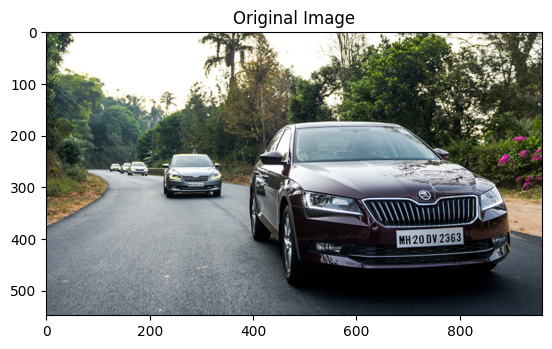

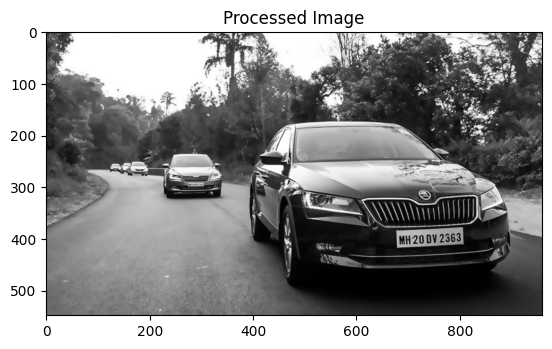

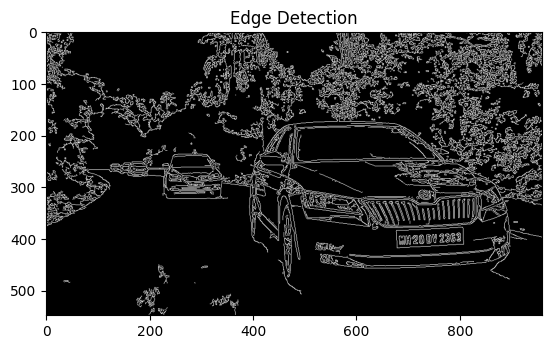

In [42]:
img = cv2.imread('ANPR_test2.jpg')  
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))
plt.title('Processed Image')
plt.show()

edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.title('Edge Detection')
plt.show()

### Step 4: Finding Contours
Contours are boundaries of shapes with the same intensity in an image. They helps in identifying objects or separate them from the background. The cv2.findContours() function is used to detect these contours in binary images which makes it easier to locate and analyze specific regions within the image.

In [43]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
print("Location: ", location)

Location:  [[[807 380]]

 [[678 384]]

 [[679 418]]

 [[808 411]]]


### Step 5: Marking Number Plate and Extracting Text from Using OCR
After this our next step will be masking out only area which include number plate so that later when we are going to extract text from it using OCR we can do it easily.

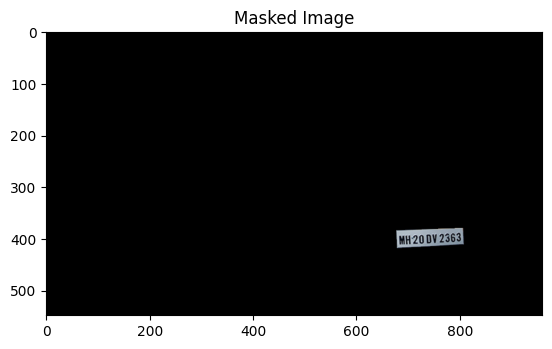

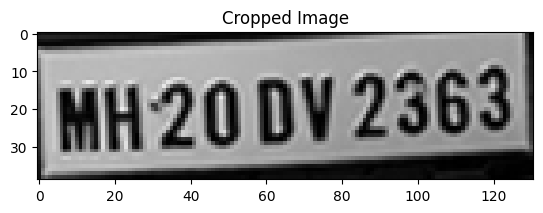

In [44]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)  
new_image = cv2.bitwise_and(img, img, mask=mask)  
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title('Masked Image')
plt.show()

(x, y) = np.where(mask == 255)  
(x1, y1) = (np.min(x), np.min(y)) 
(x2, y2) = (np.max(x), np.max(y))  
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected Text:  MH20 DV 2363


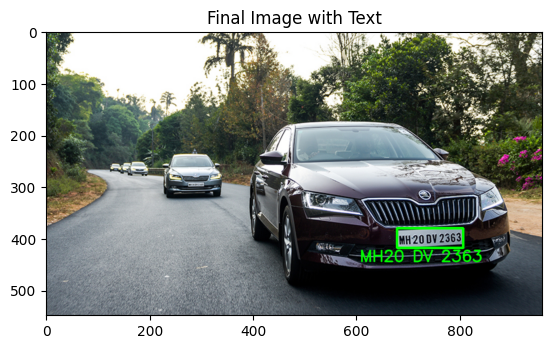

In [45]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

text = result[0][-2]
print("Detected Text: ", text)
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(location[0][0][0] - 200, location[1][0][1] + 60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(location[0][0]), tuple(location[2][0]), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title('Final Image with Text')
plt.show()
